In [1]:
import ROOT

Welcome to JupyROOT 6.24/07


In [2]:
ROOT.gSystem.Load('./RooMvn2d_cxx.so')

0


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



In [3]:
true_mean_x = 0.2
true_mean_y = 0.8
true_sigma_x = 1.0
true_sigma_y = 1.5
true_rho_xy = -0.6
true_sigma2_x = true_sigma_x * true_sigma_x
true_sigma2_y = true_sigma_y * true_sigma_y
true_cov_xy = true_rho_xy * true_sigma_x * true_sigma_y

In [4]:
x = ROOT.RooRealVar("x","x",-10.,10.)
y = ROOT.RooRealVar("y","y",-10.,10.)
mean_x = ROOT.RooRealVar("mean_x","mean_x", true_mean_x, -3., 3.)
mean_y = ROOT.RooRealVar("mean_y","mean_y", true_mean_y, -3., 3.)
sigma2_x = ROOT.RooRealVar("sigma2_x","sigma2_x", true_sigma2_x, 0.1, 9. )
sigma2_y = ROOT.RooRealVar("sigma2_y","sigma2_y", true_sigma2_y, 0.1, 9. )
cov_xy = ROOT.RooRealVar("cov_xy","cov_xy", true_cov_xy, -9., 9.)

In [5]:
rmvn = ROOT.RooMvn2d( "rmvn", "rmvn", x, y, mean_x, mean_y, sigma2_x, sigma2_y, cov_xy )

In [6]:
data = rmvn.generate( ROOT.RooArgSet(x,y), 100000 )

[#1] INFO:NumericIntegration -- RooRealIntegral::init(rmvn_Int[x,y]) using numeric integrator RooAdaptiveIntegratorND to calculate Int(x,y)


In [7]:
rfr = rmvn.fitTo( data, ROOT.RooFit.Save(True))

[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 cov_xy      -9.00000e-01  1.80000e+00   -9.00000e+00  9.00000e+00
     2 mean_x       2.00000e-01  6.00000e-01   -3.00000e+00  3.00000e+00
     3 mean_y       8.00000e-01  6.00000e-01   -3.00000e+00  3.00000e+00
     4 sigma2_x     1.00000e+00  4.50000e-01    1.00000e-01  9.00000e+00
     5 sigma2_y     2.25000e+00  8.90000e-01    1.00000e-01  9.00000e+00
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **    6 **MIGRAD        2500           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START M

In [8]:
print('')
print(' true mean_x = %.2f' % true_mean_x )
print(' true mean_y = %.2f' % true_mean_y )
print(' true sigma2_x = %.2f' % true_sigma2_x )
print(' true sigma2_y = %.2f' % true_sigma2_y )
print(' true cov_xy = %.3f' % true_cov_xy )
print('')
mean_x.Print()
mean_y.Print()
sigma2_x.Print()
sigma2_y.Print()
cov_xy.Print()


 true mean_x = 0.20
 true mean_y = 0.80
 true sigma2_x = 1.00
 true sigma2_y = 2.25
 true cov_xy = -0.900

RooRealVar::mean_x = 0.206402 +/- 0.00314527  L(-3 - 3) 
RooRealVar::mean_y = 0.800482 +/- 0.00473665  L(-3 - 3) 
RooRealVar::sigma2_x = 1.00221 +/- 0.00474685  L(0.1 - 9) 
RooRealVar::sigma2_y = 2.25413 +/- 0.0210865  L(0.1 - 9) 
RooRealVar::cov_xy = -0.904238 +/- 0.0102159  L(-9 - 9) 


[#1] INFO:Plotting -- RooAbsReal::plotOn(rmvn) plot on x integrates over variables (y)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(rmvn_Int[y]_Norm[x,y]) using numeric integrator RooIntegrator1D to calculate Int(y)
[#1] INFO:Plotting -- RooAbsReal::plotOn(rmvn) plot on y integrates over variables (x)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(rmvn_Int[x]_Norm[x,y]) using numeric integrator RooIntegrator1D to calculate Int(x)


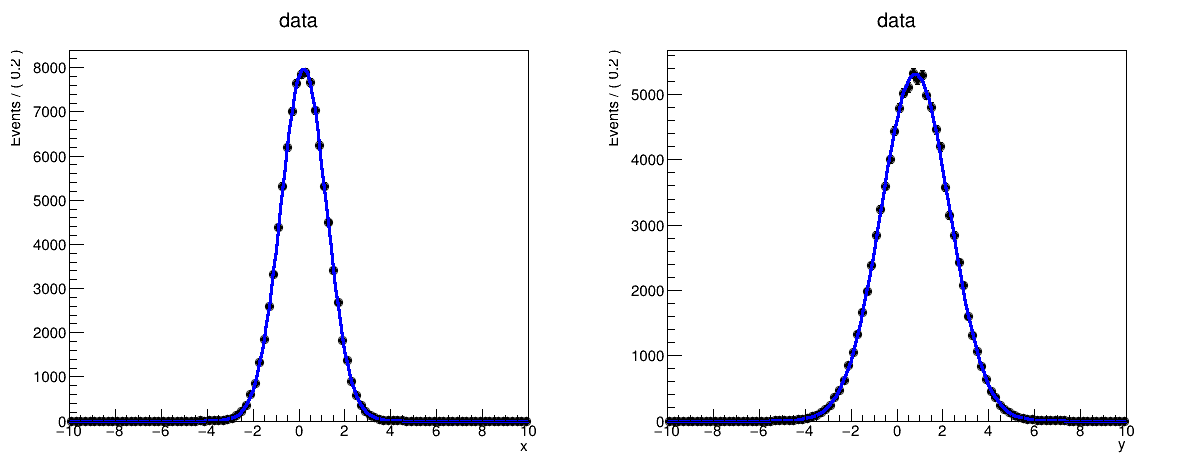

In [9]:
can = ROOT.TCanvas("can","can", 1200, 500)
can.Divide(2,1)

can.cd(1)
xframe = x.frame(ROOT.RooFit.Title("data"))
data.plotOn(xframe)
rmvn.plotOn(xframe)
xframe.Draw()
can.Draw()

can.cd(2)
yframe = y.frame(ROOT.RooFit.Title("data"))
data.plotOn(yframe)
rmvn.plotOn(yframe)
yframe.Draw()
can.Draw()
